In [1]:
#check this -> https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
import keras
import keras.optimizers
import matplotlib.pyplot as plt

tf.__version__

Using TensorFlow backend.


'1.12.0'

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#scale define, makes easier for network to learn
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#y_train[0]


In [3]:
model = Sequential()
#args: (filters, window size, input_shape)
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
#model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.5955 - acc: 0.8751 - val_loss: 0.0768 - val_acc: 0.9761
Epoch 2/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1230 - acc: 0.9637 - val_loss: 0.0485 - val_acc: 0.9849
Epoch 3/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0939 - acc: 0.9727 - val_loss: 0.0438 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0814 - acc: 0.9751 - val_loss: 0.0375 - val_acc: 0.9879
Epoch 5/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0725 - acc: 0.9794 - val_loss: 0.0483 - val_acc: 0.9848
Epoch 6/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0659 - acc: 0.9799 - val_loss: 0.0370 - val_acc: 0.9888
Epoch 7/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0578 - acc: 0.9834 - val_loss: 0.0345 - val_acc

In [4]:
model.save('9867.model')

In [59]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np


In [77]:
img = mpimg.imread("5.png")

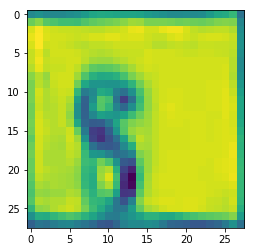

In [78]:
plt.imshow(img)

In [82]:
img = np.resize(img, (1,28,28,1))
model.predict(img)

array([[2.1048831e-03, 9.4217396e-01, 6.8962504e-04, 3.0795299e-04,
        2.0285308e-02, 1.0819506e-03, 7.3251878e-03, 1.8450938e-02,
        3.8429750e-03, 3.7371998e-03]], dtype=float32)

In [81]:
np.argmax(model.predict(img))

1

In [70]:
list(np.arange(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]